[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HUSTneeb/GoogleColabCode/blob/master/TensorFlowLearning11.ipynb)

In [0]:
import tensorflow as tf
import tensorflow.feature_column as fc

import os
import sys

import matplotlib.pyplot as plt
from IPython.display import clear_output

tf.enable_eager_execution()

In [4]:
!pip install -q requests
!git clone --depth 1 http://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


In [0]:
models_path=os.path.join(os.getcwd(),'models')
sys.path.append(models_path)

from official.wide_deep import census_dataset
from official.wide_deep import census_main

census_dataset.download("/tmp/census_data/")

In [0]:
if "PYTHONPATH" in os.environ:
  os.environ['PYTHONPATH'] +=os.pathsep+models_path
else:
  os.environ['PYTHONPATH']=models_path
  

In [0]:
#!python -m official.wide_deep.census_main --help

In [8]:
!python -m official.wide_deep.census_main --model_type=wide --train_epochs=2

I1017 03:32:06.349046 140202829473664 tf_logging.py:115] Using config: {'_model_dir': '/tmp/census_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': device_count {
  key: "GPU"
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f835b0abac8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
W1017 03:32:06.350315 140202829473664 tf_logging.py:120] 'cpuinfo' not imported. CPU info will not be logged.
I1017 03:32:11.385197 140202829473664 tf_logging.py:115] Benchmark run: {'model_name': 'wide_deep', '

In [9]:
!ls /tmp/census_data/

adult.data  adult.test


In [10]:
train_file="/tmp/census_data/adult.data"
test_file='/tmp/census_data/adult.test'

import pandas

train_df =pandas.read_csv(train_file,header=None,names=census_dataset._CSV_COLUMNS)
test_df=pandas.read_csv(test_file,header=None,names=census_dataset._CSV_COLUMNS)

train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
def easy_input_function(df,label_key,num_epochs,shuffle,batch_size):
  label=df[label_key]
  ds=tf.data.Dataset.from_tensor_slices((dict(df),label))
  
  if shuffle:
    ds=ds.shuffle(10000)
    
  ds=ds.batch(batch_size).repeat(num_epochs)
  
  return ds

ds=easy_input_function(train_df,label_key='income_bracket',num_epochs=5,shuffle=True,batch_size=10)

for feature_batch,label_batch in ds.take(1):
  print('Some featrue keys: ',list(feature_batch.keys())[:5])
  print()
  print('A batch of Ages:',feature_batch['age'])
  print()
  print('A batch of Labels:',label_batch)

Some featrue keys:  ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

A batch of Ages: tf.Tensor([18 48 32 30 35 29 28 62 45 23], shape=(10,), dtype=int32)

A batch of Labels: tf.Tensor(
[b'<=50K' b'>50K' b'<=50K' b'<=50K' b'>50K' b'<=50K' b'<=50K' b'>50K'
 b'>50K' b'<=50K'], shape=(10,), dtype=string)


In [12]:
import inspect
print(inspect.getsource(census_dataset.input_fn))

def input_fn(data_file, num_epochs, shuffle, batch_size):
  """Generate an input function for the Estimator."""
  assert tf.gfile.Exists(data_file), (
      '%s not found. Please make sure you have run census_dataset.py and '
      'set the --data_dir argument to the correct path.' % data_file)

  def parse_csv(value):
    tf.logging.info('Parsing {}'.format(data_file))
    columns = tf.decode_csv(value, record_defaults=_CSV_COLUMN_DEFAULTS)
    features = dict(zip(_CSV_COLUMNS, columns))
    labels = features.pop('income_bracket')
    classes = tf.equal(labels, '>50K')  # binary classification
    return features, classes

  # Extract lines from input files using the Dataset API.
  dataset = tf.data.TextLineDataset(data_file)

  if shuffle:
    dataset = dataset.shuffle(buffer_size=_NUM_EXAMPLES['train'])

  dataset = dataset.map(parse_csv, num_parallel_calls=5)

  # We call repeat after shuffling, rather than before, to prevent separate
  # epochs from blending together.
  dataset = 

In [13]:
ds=census_dataset.input_fn(train_file,num_epochs=5,shuffle=True,batch_size=10)

for feature_batch,label_batch in ds.take(1):
  print('Some featrue keys: ',list(feature_batch.keys())[:5])
  print()
  print('A batch of Ages:',feature_batch['age'])
  print()
  print('A batch of Labels:',label_batch)

INFO:tensorflow:Parsing /tmp/census_data/adult.data


I1017 03:46:11.005810 139918343747456 tf_logging.py:115] Parsing /tmp/census_data/adult.data


Some featrue keys:  ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

A batch of Ages: tf.Tensor([25 41 38 21 48 29 19 79 23 24], shape=(10,), dtype=int32)

A batch of Labels: tf.Tensor([False False False False  True False False  True False False], shape=(10,), dtype=bool)


In [0]:
import functools

train_inpf=functools.partial(census_dataset.input_fn,train_file,num_epochs=2,shuffle=True,batch_size=64)
test_inpf=functools.partial(census_dataset.input_fn,test_file,num_epochs=1,shuffle=False,batch_size=64)



In [15]:
age=fc.numeric_column('age')
fc.input_layer(feature_batch,[age]).numpy()

array([[25.],
       [41.],
       [38.],
       [21.],
       [48.],
       [29.],
       [19.],
       [79.],
       [23.],
       [24.]], dtype=float32)

In [16]:
classifier=tf.estimator.LinearClassifier(feature_columns=[age])
classifier.train(train_inpf)
result=classifier.evaluate(test_inpf)

clear_output()
print(result)

{'accuracy': 0.72606105, 'accuracy_baseline': 0.76377374, 'auc': 0.6783597, 'auc_precision_recall': 0.31139234, 'average_loss': 0.53549147, 'label/mean': 0.23622628, 'loss': 34.189556, 'precision': 0.22686833, 'prediction/mean': 0.30712458, 'recall': 0.06630265, 'global_step': 1018}


In [17]:
education_num=tf.feature_column.numeric_column('education_num')
capital_gain=tf.feature_column.numeric_column('capital_gain')
capital_loss=tf.feature_column.numeric_column('capital_loss')
hours_per_week=tf.feature_column.numeric_column('hours_per_week')

my_numeric_columns=[age,education_num,capital_gain,capital_loss,hours_per_week]

fc.input_layer(feature_batch,my_numeric_columns).numpy()

array([[25.,  0.,  0., 13., 40.],
       [41.,  0.,  0., 13., 40.],
       [38.,  0.,  0.,  9., 48.],
       [21.,  0.,  0., 10., 25.],
       [48.,  0.,  0.,  9., 44.],
       [29.,  0.,  0.,  9., 35.],
       [19.,  0.,  0.,  9., 30.],
       [79.,  0.,  0.,  9., 40.],
       [23.,  0.,  0., 10., 30.],
       [24.,  0.,  0.,  9., 25.]], dtype=float32)

In [18]:
classifier=tf.estimator.LinearClassifier(feature_columns=my_numeric_columns)
classifier.train(train_inpf)

result=classifier.evaluate(test_inpf)
clear_output()

for key,value in sorted(result.items()):
  print('%s:%s'%(key,value))
  

accuracy:0.78250724
accuracy_baseline:0.76377374
auc:0.6840751
auc_precision_recall:0.4912917
average_loss:2.9902804
global_step:1018
label/mean:0.23622628
loss:190.92061
precision:0.61526835
prediction/mean:0.23404077
recall:0.21164846


In [20]:
relationship=fc.categorical_column_with_vocabulary_list(
'relationship',
['Husband','Not-in-family','Wife','Own-child','Unmarried','Other-relative'])
fc.input_layer(feature_batch,[age,fc.indicator_column(relationship)])

occupation=tf.feature_column.categorical_column_with_hash_bucket(
'occupation',hash_bucket_size=1000)

for item in feature_batch['occupation'].numpy():
  print(item.decode())

Exec-managerial
Prof-specialty
Machine-op-inspct
Tech-support
Craft-repair
Sales
Other-service
Exec-managerial
Other-service
Handlers-cleaners


In [21]:
occupation_result=fc.input_layer(feature_batch,[fc.indicator_column(occupation)])
occupation_result.numpy().shape

(10, 1000)

In [22]:
tf.argmax(occupation_result,axis=1).numpy()

array([800, 979, 911, 413, 466, 631, 527, 800, 527,  10])

In [0]:
education = tf.feature_column.categorical_column_with_vocabulary_list(
    'education', [
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])

marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    'marital_status', [
        'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
        'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'])

workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    'workclass', [
        'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'])

In [25]:
my_categorical_columns=[relationship,occupation,education,marital_status,workclass]

classifier=tf.estimator.LinearClassifier(feature_columns=my_numeric_columns+my_categorical_columns)
classifier.train(train_inpf)
result=classifier.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
  print(key,':',value)

accuracy : 0.8426387
accuracy_baseline : 0.76377374
auc : 0.8919764
auc_precision_recall : 0.7202214
average_loss : 0.38773736
global_step : 1018
label/mean : 0.23622628
loss : 24.75589
precision : 0.68608695
prediction/mean : 0.24088989
recall : 0.6154446


In [26]:
age_buckets=tf.feature_column.bucketized_column(
age,boundaries=[18,25,30,35,40,45,50,55,60,65])

fc.input_layer(feature_batch,[age,age_buckets]).numpy()

array([[25.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [41.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [38.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [21.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [48.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [29.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [19.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [79.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [23.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [24.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],
      dtype=float32)

In [0]:
education_x_occupation=tf.feature_column.crossed_column(
[age_buckets,'education','occupation'],hash_bucket_size=1000)

In [28]:
import tempfile

base_columns=[
    education,marital_status,relationship,workclass,occupation,age_buckets,
]

crossed_columns=[
    tf.feature_column.crossed_column(
    ['education','occupation'],hash_bucket_size=1000),
    tf.feature_column.crossed_column(
    [age_buckets,'education','occupation'],hash_bucket_size=1000)
]

model=tf.estimator.LinearClassifier(
model_dir=tempfile.mkdtemp(),
feature_columns=base_columns+crossed_columns,
optimizer=tf.train.FtrlOptimizer(learning_rate=0.1))

INFO:tensorflow:Using default config.


I1017 07:19:36.789256 139918343747456 tf_logging.py:115] Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpv_go583s', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f410ff42cf8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I1017 07:19:36.793782 139918343747456 tf_logging.py:115] Using config: {'_model_dir': '/tmp/tmpv_go583s', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f410ff42cf8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
train_inpf=functools.partial(census_dataset.input_fn,train_file,
                            num_epochs=40,shuffle=True,batch_size=64)

model.train(train_inpf)
clear_output()
results=model.evaluate(test_inpf)

clear_output()

for key,value in sorted(results.items()):
  print(key,':',value)

accuracy : 0.83514524
accuracy_baseline : 0.76377374
auc : 0.8814626
auc_precision_recall : 0.6915461
average_loss : 0.354603
global_step : 20351
label/mean : 0.23622628
loss : 22.640358
precision : 0.6870573
prediction/mean : 0.2376948
recall : 0.5548622


In [33]:
import numpy as np
predict_df=test_df[:20].copy()

pred_iter=model.predict(
lambda:easy_input_function(predict_df,label_key='income_bracket',
                         num_epochs=1,shuffle=False,batch_size=10))

classes=np.array(['<=50K','>50K'])
pred_class_id=[]

for pred_dict in pred_iter:
  pred_class_id.append(pred_dict['class_ids'])
  
predict_df['predicted_class']=classes[np.array(pred_class_id)]
predict_df['correct']=predict_df['predicted_class']==predict_df['income_bracket']

clear_output()

predict_df[['income_bracket','predicted_class','correct']]

,income_bracket,predicted_class,correct
0,<=50K,<=50K,True
1,<=50K,<=50K,True
2,>50K,<=50K,False
3,>50K,<=50K,False
4,<=50K,<=50K,True
5,<=50K,<=50K,True
6,<=50K,<=50K,True
7,>50K,>50K,True
8,<=50K,<=50K,True
9,<=50K,<=50K,True


In [37]:
model_l1=tf.estimator.LinearClassifier(
feature_columns=base_columns+crossed_columns,
optimizer=tf.train.FtrlOptimizer(
  learning_rate=0.1,
  l1_regularization_strength=10.0,
  l2_regularization_strength=0.0))

model_l1.train(train_inpf)

results=model_l1.evaluate(test_inpf)
clear_output()
for key,value in sorted(results.items()):
  print(key,':',value)

accuracy : 0.8364351
accuracy_baseline : 0.76377374
auc : 0.883477
auc_precision_recall : 0.6941568
average_loss : 0.35186374
global_step : 20351
label/mean : 0.23622628
loss : 22.465464
precision : 0.69148594
prediction/mean : 0.23760998
recall : 0.5553822


In [38]:
model_l2=tf.estimator.LinearClassifier(
feature_columns=base_columns+crossed_columns,
optimizer=tf.train.FtrlOptimizer(
  learning_rate=0.1,
  l1_regularization_strength=0.0,
  l2_regularization_strength=10.0))

model_l2.train(train_inpf)

results=model_l2.evaluate(test_inpf)
clear_output()
for key,value in sorted(results.items()):
  print(key,':',value)

accuracy : 0.8364351
accuracy_baseline : 0.76377374
auc : 0.88344115
auc_precision_recall : 0.6942357
average_loss : 0.35179108
global_step : 20351
label/mean : 0.23622628
loss : 22.460827
precision : 0.6917342
prediction/mean : 0.23727195
recall : 0.5548622


In [0]:
def get_flat_weights(model):
  weight_names=[
      name for name in model.get_variable_names()
      if "linear_model" in name and 'Ftrl' not in name]
  weight_values=[model.get_variable_value(name) for name in weight_names]
  weights_flat=np.concatenate([item.flatten() for item in weight_values],axis=0)
  
  return weights_flat

weights_flat=get_flat_weights(model)
weights_flat_l1=get_flat_weights(model_l1)
weights_flat_l2=get_flat_weights(model_l2)

(0, 500)

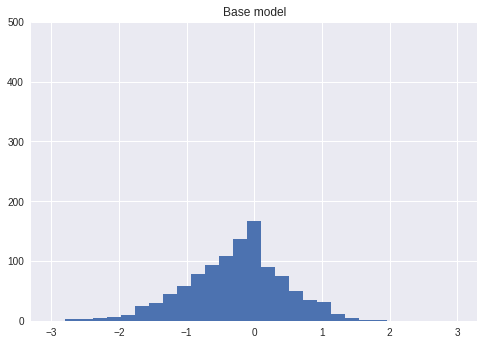

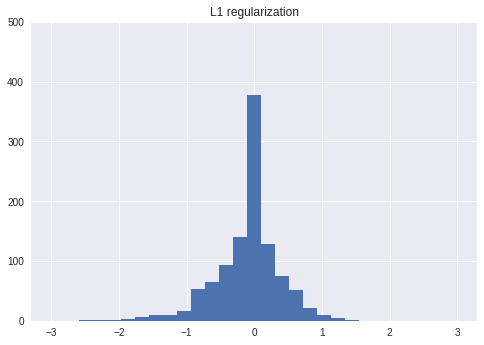

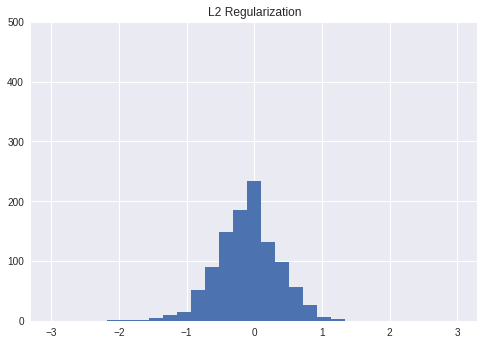

In [41]:
weight_mask=weights_flat !=0

weights_base=weights_flat[weight_mask]
weights_l1=weights_flat_l1[weight_mask]
weights_l2=weights_flat_l2[weight_mask]

plt.figure()
_=plt.hist(weights_base,bins=np.linspace(-3,3,30))
plt.title("Base model")
plt.ylim([0,500])

plt.figure()
_=plt.hist(weights_l1,bins=np.linspace(-3,3,30))
plt.title("L1 regularization")
plt.ylim([0,500])

plt.figure()
_=plt.hist(weights_l2,bins=np.linspace(-3,3,30))
plt.title("L2 Regularization")
plt.ylim([0,500])